In [1]:
# 完成集成学习例子练习，理解boosting和bagging
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
x=np.arange(0,12).reshape(3,4)#生成一个3行4列的矩阵
y=np.array([True,False,True])#布尔数组
print(y)
print(x)
x[y,1]#布尔索引，选取矩阵x中y为True的行的第二列

[ True False  True]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([1, 9])

In [3]:
x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)#生成数据集
print(x.shape)#查看数据集的形状
print(y.shape)#查看数据集的标签形状
print(np.unique(y))#查看数据集的标签

(50000, 2)
(50000,)
[0 1]


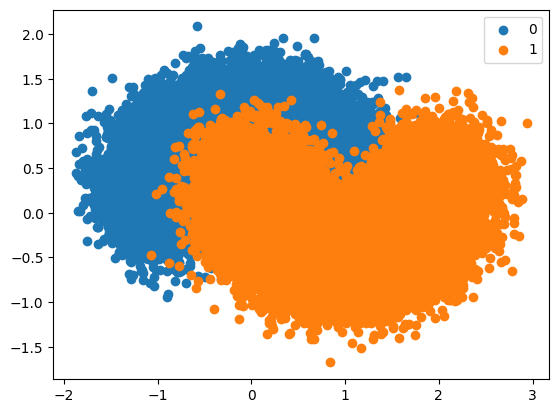

In [4]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])  # 画出标签为0的点
plt.scatter(x[y == 1, 0], x[y == 1, 1])  # 画出标签为1的点
plt.legend(['0', '1'])  # 图例
plt.show()  # 显示图像

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)#划分数据集


In [6]:
from sklearn.linear_model import LogisticRegression
#逻辑回归是搞分类的
log_clf = LogisticRegression()#逻辑回归模型
log_clf.fit(x_train, y_train)#训练模型
log_clf.score(x_test, y_test)#测试模型

0.85344

In [7]:
from sklearn.svm import SVC

svm_clf = SVC() #支持向量机
svm_clf.fit(x_train, y_train)#训练模型
svm_clf.score(x_test, y_test)#测试模型

0.91216

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()#决策树模型
dt_clf.fit(x_train, y_train)#训练模型
dt_clf.score(x_test, y_test)#测试模型

0.87632

In [9]:
y_predict1 = log_clf.predict(x_test)#预测测试集
y_predict2 = svm_clf.predict(x_test)#预测测试集
y_predict3 = dt_clf.predict(x_test)#预测测试集

In [10]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')#多数投票法
y_predict[:10]#查看前10个预测结果

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)#计算准确率

0.90464

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier())], voting='hard')#多数投票法

In [13]:
voting_clf.fit(x_train, y_train)#训练模型
print(voting_clf.score(x_test, y_test))#测试模型
voting_clf.predict(x_test)[:10]#查看前10个预测结果

0.90512


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [14]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),  
    ('dt_clf', DecisionTreeClassifier())], voting='soft')#软投票法
voting_clf2.fit(x_train, y_train)#训练模型
voting_clf2.score(x_test, y_test)#测试模型

0.9036

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=3000, bootstrap=True)#bagging
bagging_clf.fit(x_train, y_train)#训练模型
bagging_clf.score(x_test, y_test)#测试模型

0.91208

In [16]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=1000,bootstrap=True, oob_score=True)#oob得分
bagging_clf2.fit(x_train, y_train)#训练模型
bagging_clf2.oob_score_ #oob得分

0.91584

In [17]:
bagging_clf2.score(x_test, y_test)#测试模型

0.91288

In [18]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier

In [20]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=2000,bootstrap=True)#bagging
bagging_clf.fit(x_train, y_train)#训练模型
bagging_clf.score(x_test, y_test)#测试模型

CPU times: total: 2.3 s
Wall time: 3.91 s


0.91216

In [21]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=2000,bootstrap=True, n_jobs=-1)#并行化bagging
bagging_clf.fit(x_train, y_train)
bagging_clf.score(x_test, y_test)

CPU times: total: 141 ms
Wall time: 7.65 s


0.912

In [22]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=500, oob_score=True,bootstrap=True, n_jobs=-1,max_features=1, bootstrap_features=True)#随机子空间
random_subspaces_clf.fit(x, y)
random_subspaces_clf.oob_score_

0.88572

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
%%time
rc_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True, n_jobs=-1)#随机森林
rc_clf.fit(x, y)#训练模型
rc_clf.oob_score_#oob得分

CPU times: total: 53.2 s
Wall time: 7.03 s


0.90268

In [25]:
%%time
rc_clf = RandomForestClassifier(max_samples=37500, n_jobs=-1)#随机森林
rc_clf.fit(x_train, y_train)
rc_clf.score(x_test, y_test)

CPU times: total: 5.92 s
Wall time: 866 ms


0.90328

In [26]:
%%time
rc_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, oob_score=True, n_jobs=-1)#随机森林
rc_clf2.fit(x, y)
rc_clf2.oob_score_

CPU times: total: 25.1 s
Wall time: 4.38 s


0.90962

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=500, oob_score=True,bootstrap=True, n_jobs=-1)#极端随机树
et_clf.fit(x, y)
et_clf.oob_score_

0.90626

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
%%time
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=500)#adaboost
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

CPU times: total: 78.1 ms
Wall time: 153 ms


0.87624

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=500)#梯度提升
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)

0.9124